<a href="https://colab.research.google.com/github/cardstdani/practica-eda/blob/main/NotebookEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Práctica 1**

In [ ]:
!nvidia-smi

Sun Oct  1 17:10:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import random
import time
import matplotlib.pyplot as plt
import concurrent.futures

In [3]:
class CeldaSimple:
    def __init__(self):
        self.grid = None
        self.visited = None
        self.iterations = 0

    def Inicializar(self, n):
        self.grid = [[False] * n for _ in range(n)]
        self.visited = [[False] * n for _ in range(n)]

    def RayoCosmico(self, i, j):
        if not self.grid[i][j]:
            self.grid[i][j] = True
        self.iterations += 1

    def helper(self, i, j):
        if i == (len(self.grid) - 1):
            return True
        self.visited[i][j] = True
        nei = [
            [max(0, i - 1), j], [min(len(self.grid) - 1, i + 1), j],
            [i, max(0, j - 1)], [i, min(len(self.grid[0]) - 1, j + 1)],
            [max(0, i - 1), max(0, j - 1)],
            [min(len(self.grid) - 1, i + 1), min(len(self.grid[0]) - 1, j + 1)],
            [max(0, i - 1), min(len(self.grid[0]) - 1, j + 1)],
            [min(len(self.grid) - 1, i + 1), max(0, j - 1)]
        ]

        for k in nei:
            if not self.visited[k[0]][k[1]] and self.grid[k[0]][k[1]]:
                if self.helper(k[0], k[1]):
                    return True
        return False

    def Cortocircuito(self):
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                self.visited[i][j] = False

        for i in range(len(self.grid[0])):
            if self.grid[0][i]:
                if self.helper(0, i):
                    return True
        return False

    def __str__(self):
        out = ""

        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                out += "X" if self.grid[i][j] else "."
                if j < len(self.grid[0]) - 1:
                    out += " "
            out += "\n"

        return out

SEMILLA = 42
def main():
    random.seed(SEMILLA)
    print("¿Validación? [S/N] ", end='')
    validar = input().strip().upper().startswith('S')
    print("Tamaño (n) = ", end='')
    n = int(input())
    num_rep = 1
    if not validar:
        print("Repeticiones = ", end='')
        num_rep = int(input())

    celda = CeldaSimple()
    tpo_total = 0
    num_rayos = 0

    for k in range(num_rep):
        # Simulación
        celda.Inicializar(n)
        num_rayos = 0
        tpo1 = time.perf_counter()
        while not celda.Cortocircuito():
            # Elegir átomo al azar y transmutarlo
            celda.RayoCosmico(random.randint(0, n - 1), random.randint(0, n - 1))
            num_rayos += 1
        tpo2 = time.perf_counter()
        tpo_total += tpo2 - tpo1
        print("#", end='')

    print("\nTiempo medio = {:.5f}".format(tpo_total / num_rep))

    if validar:
        print("Número de rayos =", num_rayos)
        print(celda)

if __name__ == "__main__":
    main()

¿Validación? [S/N] S
Tamaño (n) = 10
#
Tiempo medio = 0.01157
Número de rayos = 88
. X . X X . . . X .
X . . . . X X X X X
. . X X X X X X X .
X X X X . . . . X X
X X X X . . X . X X
X X . X X . X . . X
X . . X X . . . . X
X X X . . X X . X X
X X X X X . . . . X
. X X X . X X . . .



**Simulación específica**

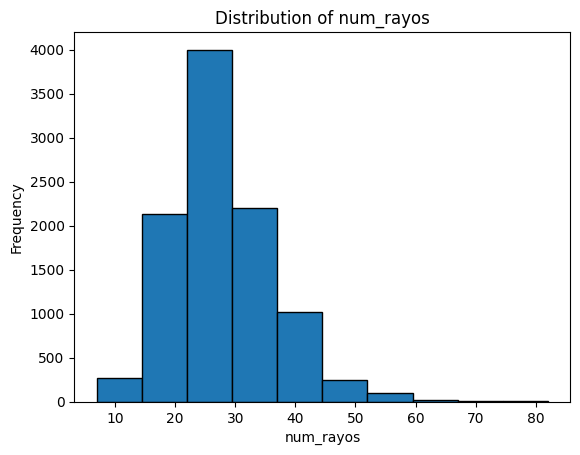

[69, 70, 70, 71, 74, 75, 78, 80, 81, 82]


In [14]:
celda = CeldaSimple()
y = []
n = 7

random.seed()
for k in range(10000):
    celda.Inicializar(n)
    num_rayos = 0
    while not celda.Cortocircuito():
        # Elegir átomo al azar y transmutarlo
        celda.RayoCosmico(random.randint(0, n - 1), random.randint(0, n - 1))
        num_rayos += 1
    #print(num_rayos)
    y.append(num_rayos)

plt.hist(y, edgecolor='black')
plt.title('Distribution of num_rayos')
plt.xlabel('num_rayos')
plt.ylabel('Frequency')
plt.show()
print(sorted(y)[-10:])

**Medidas Tiempo**

In [ ]:
with open('t_values_python.txt', 'w') as file:
  celda = CeldaSimple()

  for i in range(2, 40):
      for j in range(15):
          celda.Inicializar(i)
          t = time.perf_counter()
          while not celda.Cortocircuito():
              celda.RayoCosmico(random.randint(0, i - 1), random.randint(0, i - 1))
          t = time.perf_counter() - t
          print(i, j, t)
          file.write(f"{i} {t}\n")

In [ ]:
import numpy as np
from numba import njit, prange
import random
import time
import concurrent.futures

class CeldaSimple:
    def __init__(self):
        self.grid = None
        self.visited = None
        self.iterations = 0

    def Inicializar(self, n):
        self.grid = np.full((n, n), False, dtype=np.bool_)
        self.visited = np.full((n, n), False, dtype=np.bool_)

    def RayoCosmico(self, i, j):
        if not self.grid[i][j]:
            self.grid[i][j] = True
        self.iterations += 1

    def helper(self, i, j):
        return _helper_numba(self.grid, self.visited, i, j)

    def Cortocircuito(self):
        return _cortocircuito_numba(self.grid, self.visited)

    def __str__(self):
        out = ""
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                out += "X" if self.grid[i][j] else "."
                if j < self.grid.shape[1] - 1:
                    out += " "
            out += "\n"
        return out

@njit
def _helper_numba(grid, visited, i, j):
    if i == grid.shape[0] - 1:
        return True
    visited[i][j] = True
    nei = [
        (max(0, i - 1), j), (min(grid.shape[0] - 1, i + 1), j),
        (i, max(0, j - 1)), (i, min(grid.shape[1] - 1, j + 1)),
        (max(0, i - 1), max(0, j - 1)),
        (min(grid.shape[0] - 1, i + 1), min(grid.shape[1] - 1, j + 1)),
        (max(0, i - 1), min(grid.shape[1] - 1, j + 1)),
        (min(grid.shape[0] - 1, i + 1), max(0, j - 1))
    ]

    for k in nei:
        if not visited[k[0]][k[1]] and grid[k[0]][k[1]]:
            if _helper_numba(grid, visited, k[0], k[1]):
                return True
    return False

@njit(parallel=True)
def _cortocircuito_numba(grid, visited):
    for i in prange(grid.shape[0]):
        for j in prange(grid.shape[1]):
            visited[i][j] = False

    for i in prange(grid.shape[1]):
        if grid[0][i]:
            if _helper_numba(grid, visited, 0, i):
                return True
    return False

def simulation_run(params):
    i, j = params
    celda = CeldaSimple()
    celda.Inicializar(i)
    t = time.perf_counter()
    while not celda.Cortocircuito():
        celda.RayoCosmico(random.randint(0, i - 1), random.randint(0, i - 1))
    t = time.perf_counter() - t
    print(i, j, t)
    return f"{i} {t}\n"

with open('t_values_python.txt', 'w') as file:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        params = [(i, j) for i in range(2, 40) for j in range(15)]
        results = executor.map(simulation_run, params)

        file.writelines(results)